<div style="display: flex; align-items: center;">
  <div style="flex: 1;">
    <h1>Programation and Data Analysis - Technical Test</h2>
    <h2>BTG Pactual S.A.</h3>
    <p><strong>Made By:</strong> Julián Andrés Gómez Durán</p>
  </div>
  <div style="flex: 1; text-align: right;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Btg-logo-blue.svg/1200px-Btg-logo-blue.svg.png"
      style="width: 300px; margin: 0 40px 40px 40px;">
  </div>
</div>
<div style="width: 100%; background-color: darkblue; color: lightblue; text-align: center;"></div>


In [1]:
import pandas as pd # Tratado de datos
import os # Interacción con software
import numpy as np  # Algebra Lineal
import matplotlib.pyplot as plt # Graficación
import seaborn as sns # Graficación
from datetime import datetime # Fechas
from matplotlib.dates import DateFormatter # Fechas en gráficas
pd.set_option('display.float_format',
            '{:.4f}'.format) # Evita notación cientifica y muestra 4 decimales.

In [2]:
#######################################################################################################
# Directorio donde se encuentran archivos .xlsx con datos (Cambiar cuando se vaya a correr el código) #
#######################################################################################################
ruta_xlsx = 'C:/Users/silve/Desktop/BTG - Prueba técnica/Datos'
os.chdir(ruta_xlsx)
# Lista de nombres de archivos .xlsx disponibles en carpeta
files_names = [excel_file for excel_file in os.listdir(ruta_xlsx)
                if excel_file.endswith('.xlsx')]
files_names

['Reporte Mensual Enero - Agosto 2023.xlsx',
 'Reporte Mensual Enero - Diciembre 2019.xlsx',
 'Reporte Mensual Enero - Diciembre 2020.xlsx',
 'Reporte Mensual Enero - Diciembre 2021.xlsx',
 'Reporte Mensual Enero - Diciembre 2022.xlsx']

## Carga y preprocesamiento de datos.

In [3]:
## Función que importa, trata y limpia la base de datos que se introduzca en el input
#  file_path. El input data_year se utiliza para especificar el año correspondiente
#  al archivo en uso.
def import_excel_custom(file_path, data_year):
    # Importación de archivo .xlsx
    file_data = pd.read_excel(file_path, sheet_name = None)
    
    # Diccionario con nombre de sheet (que es el mes correspondiente a los datos)
    # y el contenido de esta. Cada diccionario se aloja en una entrada 
    # de la lista.
    file_data_unique = [{'sheet_name': sheet_name, 'dataframe': dataframe}
                        for sheet_name, dataframe in file_data.items()]
    
    # Agregación de columnas 'MES' correspondiente al sheet's name
    # y 'AÑO' correspondiente al valor de la variable data_year.
    for entry in file_data_unique:
        entry['dataframe']['MES'] = entry['sheet_name']
        entry['dataframe']['AÑO'] = data_year
        
    # Toma el contenido de la llave 'dataframe' en cada diccionario,
    # convirtiendo el contenido de la lista en objetos dataframes.  
    file_data_unique = [entry['dataframe']
                        for entry in file_data_unique]
    
    #Reubicación de columnas 'Año' y 'Mes' al inicio de la base de datos.
    file_data_unique = [dataframe.insert(0, 'MES', dataframe.pop('MES')) 
                        or dataframe for dataframe in file_data_unique] 
    file_data_unique = [dataframe.insert(0, 'AÑO', dataframe.pop('AÑO')) 
                        or dataframe for dataframe in file_data_unique] 
    
    # Se renombran las columnas con los datos de la fila 2 
    file_data_unique = [dataframe.rename(columns = dataframe.iloc[2])
                        for dataframe in file_data_unique]
    
    # Se toman los datos a partir de la fila 3. Las filas
    # anteriores no son necesarias.
    file_data_unique = [dataframe.iloc[3:] 
                        for dataframe in file_data_unique]
    
    # Renombre de columnas por inconsistencias.
    file_data_unique = [dataframe.rename(columns = {data_year:'AÑO',
                                                    str(dataframe.columns[1]):'MES',
                                                    ' UEJ':'UEJ',
                                                    'SUB\nCTA':'SUB_CTA',
                                                    'SOR\nORD':'SOR_ORD',
                                                    'APR. VIGENTE':'APROPIACION'})
                        for dataframe in file_data_unique]
    # Reinicio del index.
    file_data_unique = [dataframe.reset_index(drop = True)
                        for dataframe in file_data_unique]
    
    # Limpieza cola de dataframe por filas innecesarias mediante boolean mask.
    file_data_unique = [dataframe[:dataframe['UEJ'].isna().index[dataframe['UEJ'].isna()].tolist()[0]]
                        for dataframe in file_data_unique]
    
    # Unión de cada entrada de la lista, generando una base de datos anual
    file_data_unique = pd.concat(file_data_unique, ignore_index = True)
    
    # Base de datos anual 
    return file_data_unique

In [4]:
# Lista con bases de datos anuales generadas con la función creada anteriormente.
# Los archivos son called según los nombres alojados en la lista files_names
# y la posición que ocupan en este correspondiente al año.
PGN_DATA_list = [import_excel_custom('Reporte Mensual Enero - Diciembre 2019.xlsx', 2019), #PGN - Jan to Dec - 2019
                import_excel_custom('Reporte Mensual Enero - Diciembre 2020.xlsx', 2020),  #PGN - Jan to Dec - 2020
                import_excel_custom('Reporte Mensual Enero - Diciembre 2021.xlsx', 2021),  #PGN - Jan to Dec - 2021
                import_excel_custom('Reporte Mensual Enero - Diciembre 2022.xlsx', 2022),  #PGN - Jan to Dec - 2022
                import_excel_custom('Reporte Mensual Enero - Agosto 2023.xlsx', 2023)]  #PGN - Jan to Dec - 2023

In [5]:
# Base de datos completa: PGN - Jan/2019 to Aug/2023
PGN_DATA = pd.concat(PGN_DATA_list, ignore_index = True)

In [6]:
print(f'El DF tiene {PGN_DATA.shape[0]} columnas y {PGN_DATA.shape[1]} filas.')
print('Las variables en el DF y su tipo son:','\n', PGN_DATA.dtypes)

El DF tiene 227452 columnas y 19 filas.
Las variables en el DF y su tipo son: 
 AÑO             int64
MES            object
UEJ            object
NOMBRE UEJ     object
RUBRO          object
TIPO           object
CTA            object
SUB_CTA        object
OBJ            object
ORD            object
SOR_ORD        object
FUENTE         object
REC            object
SIT            object
DESCRIPCION    object
APROPIACION    object
COMPROMISO     object
OBLIGACION     object
PAGOS          object
dtype: object


In [7]:
# Conversión de variables numéricas a int64.
PGN_DATA['AÑO'] = PGN_DATA['AÑO'].astype('int64')
# Conversión de variables numéricas mediante función pd.to_numeric
# para tratar con integers y floats.
numeric_variables = ['APROPIACION','COMPROMISO','OBLIGACION','PAGOS']
for variable in numeric_variables:
    PGN_DATA[variable] = pd.to_numeric(PGN_DATA[variable], errors='coerce').astype('float64')  
print('Las variables en el DF y su tipo son:','\n', PGN_DATA.dtypes)

Las variables en el DF y su tipo son: 
 AÑO              int64
MES             object
UEJ             object
NOMBRE UEJ      object
RUBRO           object
TIPO            object
CTA             object
SUB_CTA         object
OBJ             object
ORD             object
SOR_ORD         object
FUENTE          object
REC             object
SIT             object
DESCRIPCION     object
APROPIACION    float64
COMPROMISO     float64
OBLIGACION     float64
PAGOS          float64
dtype: object


Las variables *UEJ* y *NOMBRE UEJ* se encargan de identificar a las unidades ejecutoras por código y nombre.  
<!-- La variable *DESCRIPCIÓN* especifica el objeto de ejecución *COMPLEMENTAR*   -->
Las variables *APR. VIGENTE*, *COMPROMISO*, *OBLIGACIÓN* y *PAGOS* son los sujetos principales  
para realizar el análisis de datos sobre la ejecución del PGN. Estas se interpretan como:  
- <span style="color: orange;">APR. VIGENTE</span>: Autorizaciones máximas de gasto aprobadas por el congreso para su ejecución.
- <span style="color: orange;">COMPROMISO</span>: Actos en proceso de ejecución según el objeto establecido en los mismos.  
- <span style="color: orange;">OBLIGACION</span>: Monto adeudado producto de los <span style="color: orange;">compromisos</span> 
adquiridos.
- <span style="color: orange;">PAGOS</span>: Monto acumulado de pagos realizados a la fecha.

Estas interpretaciones tienen como base las definiciones de gastos estipuladas en el capitulo VI  
'Definición de los Gastos del Decreto de Liquidación' (No. 2590 de 2022).

Las variables *RUBRO*, *TIPO*, *CTA*, *SUB_CTA*, *OBJ*, *ORD*, *SOR_ORD*, *FUENTE*, *REC* y *SIT* describen el tipo  
de cuenta de los recursos, la fuente de proveniencia de estos, y demás aspectos que, aunque son útiles,  
no son necesarios para este análisis. Por lo tanto, se filtrará para dejar únicamente las variables:  
- *Año*, *Mes*, *UEJ*, *NOMBRE UEJ*, *DESCRIPCIÓN*, *APR. VIGENTE*, *COMPROMISO*, *OBLIGACIÓN* y *PAGOS*.

In [8]:
# Filtrado de variables a utilizar
PGN_DATA_filter = PGN_DATA[['AÑO', 'MES',
                            # 'UEJ',
                            'NOMBRE UEJ',
                            # 'RUBRO', 'TIPO', 'CTA', 'SUB_CTA',
                            # 'OBJ', 'ORD', 'SOR_ORD', 'FUENTE',
                            # 'REC', 'SIT',
                            'DESCRIPCION', 'APROPIACION', 'COMPROMISO',
                            'OBLIGACION', 'PAGOS']]
print(f'El DF tiene {PGN_DATA_filter.shape[0]} columnas y {PGN_DATA_filter.shape[1]} filas.')
print('Las variables en el DF y su tipo son:','\n', PGN_DATA_filter.dtypes)

El DF tiene 227452 columnas y 8 filas.
Las variables en el DF y su tipo son: 
 AÑO              int64
MES             object
NOMBRE UEJ      object
DESCRIPCION     object
APROPIACION    float64
COMPROMISO     float64
OBLIGACION     float64
PAGOS          float64
dtype: object


## Procesamiento de Datos

In [9]:
# Copia de dataframe 
PGN_DATA_A = PGN_DATA_filter.copy()

In [10]:
# Generación de variables'TOT_ ': Suma total de valores en las variables 'APROPIACION', 
# 'COMPROMISO', 'OBLIGACION' Y 'PAGO' AGRUPANDO POR 'AÑO','MES' y 'NOMBRE UEJ'. Esto se hace
#  con el finde obtener el agregado de las variables en la totalidad de los objetos de 
#  destinación presupuestaria por unidad ejecutora. 
PGN_DATA_A[['TOT_APROPIACION','TOT_COMPROMISO',
            'TOT_OBLIGACION','TOT_PAGO']] = PGN_DATA_A.groupby(['AÑO','MES',
                                                                'NOMBRE UEJ'])[['APROPIACION','COMPROMISO',
                                                                            'OBLIGACION','PAGOS']].transform('sum')
# Limpieza de valores duplicados
PGN_DATA_A = PGN_DATA_A.drop_duplicates(subset=['AÑO','MES','NOMBRE UEJ'])
# Limpieza de variables utilizadas en la generación de las variables 'TOT_ '.
PGN_DATA_A = PGN_DATA_A.drop(columns=(['DESCRIPCION','APROPIACION','COMPROMISO','OBLIGACION','PAGOS']))
# Reinicio de indice.
PGN_DATA_A.reset_index(drop = True, inplace = True)
PGN_DATA_A.head()

,AÑO,MES,NOMBRE UEJ,TOT_APROPIACION,TOT_COMPROMISO,TOT_OBLIGACION,TOT_PAGO
0,2019,Enero,SENADO DE LA REPUBLICA,257505000000.0000,30349192391.7400,12488420826.6400,11057491863.0000
1,2019,Enero,CAMARA DE REPRESENTANTES,348742000000.0000,59760959862.0000,13396075583.0000,13393975583.0000
2,2019,Enero,PRESIDENCIA DE LA REPUBLICA - GESTION GENERAL,209603647214.0000,143608978559.6100,8111193366.0500,7728166921.4600
3,2019,Enero,AGENCIA PRESIDENCIAL DE COOPERACION INTERNACIO...,124174095538.0000,2081049862.0000,856395103.0000,849647006.0000
4,2019,Enero,UNIDAD NACIONAL PARA LA GESTION DEL RIESGO DE ...,127220432618.0000,81966641214.5000,525015517.0000,525015517.0000


<div style="display: flex; align-items: center;">
  <div style="flex: 1;">
    <h1>Unidades Ejecutoras con mayor participación en el PGN</h2>
  </div>
</div>
<div style="width: 100%; background-color: orange; color: lightblue; text-align: center;"></div>

In [11]:
# Copia de dataframe
PGN_DATA_TOT = PGN_DATA_A.copy()
PGN_DATA_TOT.head()

,AÑO,MES,NOMBRE UEJ,TOT_APROPIACION,TOT_COMPROMISO,TOT_OBLIGACION,TOT_PAGO
0,2019,Enero,SENADO DE LA REPUBLICA,257505000000.0000,30349192391.7400,12488420826.6400,11057491863.0000
1,2019,Enero,CAMARA DE REPRESENTANTES,348742000000.0000,59760959862.0000,13396075583.0000,13393975583.0000
2,2019,Enero,PRESIDENCIA DE LA REPUBLICA - GESTION GENERAL,209603647214.0000,143608978559.6100,8111193366.0500,7728166921.4600
3,2019,Enero,AGENCIA PRESIDENCIAL DE COOPERACION INTERNACIO...,124174095538.0000,2081049862.0000,856395103.0000,849647006.0000
4,2019,Enero,UNIDAD NACIONAL PARA LA GESTION DEL RIESGO DE ...,127220432618.0000,81966641214.5000,525015517.0000,525015517.0000


In [12]:
# Generación de variables 'TOT_ ': Suma total de valores en las variables 'APROPIACION', 
# 'COMPROMISO', 'OBLIGACION' Y 'PAGO' AGRUPANDO POR 'NOMBRE UEJ'. Esto se hace con el fin
#  de obtener el agregado de las variables en la totalidad del periodo de estudio.
PGN_DATA_TOT[['TOT_APROPIACION','TOT_COMPROMISO','TOT_OBLIGACION',
                'TOT_PAGO']] = PGN_DATA_TOT.groupby(['NOMBRE UEJ'])[['TOT_APROPIACION',
                                                        'TOT_COMPROMISO',
                                                        'TOT_OBLIGACION',
                                                        'TOT_PAGO']].transform('sum').reset_index(drop = True)
# Limpieza de variables.
PGN_DATA_TOT = PGN_DATA_TOT.drop(columns=['AÑO','MES'])
# Limpieza de duplicados.
PGN_DATA_TOT = PGN_DATA_TOT.drop_duplicates(subset=['NOMBRE UEJ']).reset_index(drop = True)
# Generación de variable: Razón Apropiacion/Apropiacion Total.
PGN_DATA_TOT['APROPIACION_ratio'] = (PGN_DATA_TOT['TOT_APROPIACION']/PGN_DATA_TOT['TOT_APROPIACION'].sum())*100
PGN_DATA_TOT.head()

,NOMBRE UEJ,TOT_APROPIACION,TOT_COMPROMISO,TOT_OBLIGACION,TOT_PAGO,APROPIACION_ratio
0,SENADO DE LA REPUBLICA,17872887408412.0000,9371639771315.6699,7300682976534.6797,7280857360902.9404,0.0984
1,CAMARA DE REPRESENTANTES,23824215730181.0000,13762058496023.4004,10691438263739.3594,10597675157439.1309,0.1311
2,PRESIDENCIA DE LA REPUBLICA - GESTION GENERAL,51617311852172.0000,41367126130244.8594,6868956679450.3701,6771748345194.3301,0.2841
3,AGENCIA PRESIDENCIAL DE COOPERACION INTERNACIO...,7744964902348.0000,2499062359551.5200,1264041520079.1201,1247198872154.9199,0.0426
4,UNIDAD NACIONAL PARA LA GESTION DEL RIESGO DE ...,105188137025618.5625,102614084440829.3438,18975941219126.6797,18972074210335.3594,0.5790


In [13]:
# Extracción de las 5 Unidades Ejecutoras con mayor participación en PGN
# según la razón Apropiación/Apropiación Total
MAX_PARTICIPACION_PNG = PGN_DATA_TOT.nlargest(5, 'APROPIACION_ratio')
# Limpieza de columnas insumo.
MAX_PARTICIPACION_PNG = MAX_PARTICIPACION_PNG.drop(columns = ['TOT_APROPIACION','TOT_COMPROMISO',
                                                                'TOT_OBLIGACION','TOT_PAGO']).reset_index(drop = True)
# Lista con nombres de unidades ejecutoras con mayor participación en PGN
top_5_sectors = MAX_PARTICIPACION_PNG['NOMBRE UEJ'].unique().tolist()
# Generación de fila con los valores complementarios a la totalidad de participación
# de las 5 unidades ejecutoras principales para cada variable.
MAX_PARTICIPACION_PNG.loc[MAX_PARTICIPACION_PNG.index.max() + 1] = {'NOMBRE UEJ':'OTROS',
                                                    'APROPIACION_ratio':(100-MAX_PARTICIPACION_PNG['APROPIACION_ratio'].sum())}
# Renombre de variables.
MAX_PARTICIPACION_PNG.rename(columns = {'NOMBRE UEJ':'Unidad Ejecutora',
                                        'APROPIACION_ratio':'Apropiacion'}, inplace = True)
MAX_PARTICIPACION_PNG

,Unidad Ejecutora,Apropiacion
0,SERVICIO DE LA DEUDA PÚBLICA NACIONAL,19.1668
1,MINISTERIO EDUCACION NACIONAL - GESTION GENERAL,13.7842
2,MINISTERIO DE SALUD Y PROTECCION SOCIAL - GEST...,11.1487
3,MINISTERIO DEL TRABAJO - GESTION GENERAL,8.3494
4,MINISTERIO DE HACIENDA Y CRÉDITO PÚBLICO - GES...,7.9613
5,OTROS,39.5896


In [14]:
# Participación reescalada con el fin de mostrar la repartición del 60.4% de recursos,
# que es lo que tienen asignadas las 5 unidades ejecutoras principales.
MAX_PARTICIPACION_PNG_REESCALED = MAX_PARTICIPACION_PNG[:5].copy()
# Razón apropiación/apropiación total con el reescalamiento. Se realiza dos veces
# para garantizar que la suma de las razones sea 1.
MAX_PARTICIPACION_PNG_REESCALED['Apropiacion'] = MAX_PARTICIPACION_PNG_REESCALED['Apropiacion']/MAX_PARTICIPACION_PNG_REESCALED['Apropiacion'].sum()
MAX_PARTICIPACION_PNG_REESCALED['Apropiacion'] = MAX_PARTICIPACION_PNG_REESCALED['Apropiacion']/MAX_PARTICIPACION_PNG_REESCALED['Apropiacion'].sum()
MAX_PARTICIPACION_PNG_REESCALED

,Unidad Ejecutora,Apropiacion
0,SERVICIO DE LA DEUDA PÚBLICA NACIONAL,0.3173
1,MINISTERIO EDUCACION NACIONAL - GESTION GENERAL,0.2282
2,MINISTERIO DE SALUD Y PROTECCION SOCIAL - GEST...,0.1845
3,MINISTERIO DEL TRABAJO - GESTION GENERAL,0.1382
4,MINISTERIO DE HACIENDA Y CRÉDITO PÚBLICO - GES...,0.1318


In [15]:
# Función que agrega quiebres en los nombres de las unidades ejecutoras
# que se utilizan posteriormente en la graficación.
def add_line_breaks(text, words_per_line=3):
    words = text.split(' ')
    lines = [' '.join(words[i:i+words_per_line]) for i in range(0, len(words), words_per_line)]
    return '\n'.join(lines)

# Lista con nombres modificados por la función.
labels_graph = MAX_PARTICIPACION_PNG['Unidad Ejecutora'].apply(add_line_breaks).tolist()

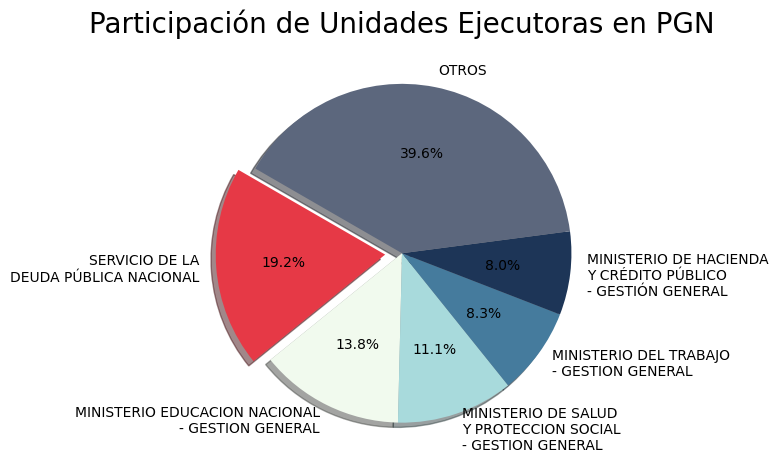

In [16]:
# Grafico #1: Pie chart - Unidades ejecutoras con mayor participación en PNG
plt.figure(figsize = (5.5, 5.5))
explode = (0.1, 0, 0, 0, 0, 0)  
pie_colors = ['#e63946','#f1faee','#a8dadc','#457b9d','#1d3557','#5c677d']
plt.pie(MAX_PARTICIPACION_PNG['Apropiacion'],
        labels = labels_graph,
        autopct = '%1.1f%%',
        startangle = 150,
        colors = pie_colors,
        explode = explode,
        shadow = True)
plt.title('Participación de Unidades Ejecutoras en PGN', fontsize = 20)
plt.show()

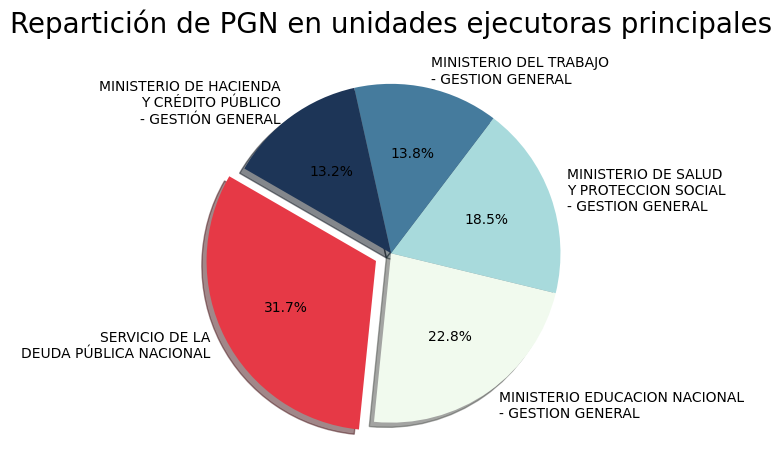

In [17]:
# Grafico #2: Pie chart - Repartición del 60.4% de recursos
plt.figure(figsize = (5.5, 5.5))
explode = (0.1, 0, 0, 0, 0, )  
pie_colors = ['#e63946','#f1faee','#a8dadc','#457b9d','#1d3557']
plt.pie(MAX_PARTICIPACION_PNG_REESCALED['Apropiacion'],
        labels = labels_graph[:5],
        autopct = '%1.1f%%',
        startangle = 150,
        colors = pie_colors,
        explode = explode,
        shadow = True)
plt.title('Repartición de PGN en unidades ejecutoras principales', fontsize = 20)
plt.show()

<div style="display: flex; align-items: center;">
  <div style="flex: 1;">
    <h1>Evolución histórica y Estacionalidad - Razones de Ejecución - 5 Unidades Ejecutoras con mayor participación.</h2>
  </div>
</div>
<div style="width: 100%; background-color: green; color: lightblue; text-align: center;"></div>

In [18]:
print('Los 5 sectores (Unidades Ejecutoras) con mayor participación son: ')
top_5_sectors

Los 5 sectores (Unidades Ejecutoras) con mayor participación son: 


['SERVICIO DE LA DEUDA PÚBLICA NACIONAL',
 'MINISTERIO EDUCACION NACIONAL - GESTION GENERAL',
 'MINISTERIO DE SALUD Y PROTECCION SOCIAL - GESTION GENERAL',
 'MINISTERIO DEL TRABAJO - GESTION GENERAL',
 'MINISTERIO DE HACIENDA Y CRÉDITO PÚBLICO - GESTIÓN GENERAL']

In [19]:
# Copia de dataframe
PGN_DATA_MONTHLY = PGN_DATA_A.copy()
PGN_DATA_MONTHLY.head()

,AÑO,MES,NOMBRE UEJ,TOT_APROPIACION,TOT_COMPROMISO,TOT_OBLIGACION,TOT_PAGO
0,2019,Enero,SENADO DE LA REPUBLICA,257505000000.0000,30349192391.7400,12488420826.6400,11057491863.0000
1,2019,Enero,CAMARA DE REPRESENTANTES,348742000000.0000,59760959862.0000,13396075583.0000,13393975583.0000
2,2019,Enero,PRESIDENCIA DE LA REPUBLICA - GESTION GENERAL,209603647214.0000,143608978559.6100,8111193366.0500,7728166921.4600
3,2019,Enero,AGENCIA PRESIDENCIAL DE COOPERACION INTERNACIO...,124174095538.0000,2081049862.0000,856395103.0000,849647006.0000
4,2019,Enero,UNIDAD NACIONAL PARA LA GESTION DEL RIESGO DE ...,127220432618.0000,81966641214.5000,525015517.0000,525015517.0000


In [20]:
# Renombre de variable.
PGN_DATA_MONTHLY.rename(columns = {'NOMBRE UEJ':'Unidad Ejecutora'}, inplace = True)
# Filtrado de Unidades Ejecutoras dejando únicamente las 5 con mayor participación.
PGN_DATA_MONTHLY = PGN_DATA_MONTHLY[PGN_DATA_MONTHLY['Unidad Ejecutora'].isin(top_5_sectors)].reset_index(drop = True)
# Verificación
PGN_DATA_MONTHLY['Unidad Ejecutora'].unique()

array(['MINISTERIO DE HACIENDA Y CRÉDITO PÚBLICO - GESTIÓN GENERAL',
       'SERVICIO DE LA DEUDA PÚBLICA NACIONAL',
       'MINISTERIO DE SALUD Y PROTECCION SOCIAL - GESTION GENERAL',
       'MINISTERIO EDUCACION NACIONAL - GESTION GENERAL',
       'MINISTERIO DEL TRABAJO - GESTION GENERAL'], dtype=object)

In [21]:
# Razón de ejecución: Comprobación/Apropiación
PGN_DATA_MONTHLY['COMP/APROP_ratio'] = (PGN_DATA_MONTHLY['TOT_COMPROMISO']/PGN_DATA_MONTHLY['TOT_APROPIACION'])*100
# Razón de ejecución: Obligación/Apropiación
PGN_DATA_MONTHLY['OBLI/APROP_ratio'] = (PGN_DATA_MONTHLY['TOT_OBLIGACION']/PGN_DATA_MONTHLY['TOT_APROPIACION'])*100
# Razón de ejecución: Pago/Apropiación
PGN_DATA_MONTHLY['PAG/APROP_ratio'] = (PGN_DATA_MONTHLY['TOT_PAGO']/PGN_DATA_MONTHLY['TOT_APROPIACION'])*100
# Eliminación de columnas insumo.
PGN_DATA_MONTHLY.drop(columns= ['TOT_APROPIACION', 'TOT_COMPROMISO', 'TOT_OBLIGACION', 'TOT_PAGO'], inplace = True)
PGN_DATA_MONTHLY.head()

,AÑO,MES,Unidad Ejecutora,COMP/APROP_ratio,OBLI/APROP_ratio,PAG/APROP_ratio
0,2019,Enero,MINISTERIO DE HACIENDA Y CRÉDITO PÚBLICO - GES...,8.0351,3.1104,3.1093
1,2019,Enero,SERVICIO DE LA DEUDA PÚBLICA NACIONAL,2.7679,2.2689,1.4911
2,2019,Enero,MINISTERIO DE SALUD Y PROTECCION SOCIAL - GEST...,6.8858,6.7595,6.7584
3,2019,Enero,MINISTERIO EDUCACION NACIONAL - GESTION GENERAL,30.7716,6.0680,6.0567
4,2019,Enero,MINISTERIO DEL TRABAJO - GESTION GENERAL,3.5686,2.9816,2.9772


In [22]:
# Lista vacia donde se alojarán dataframes por unidad ejecutora
sector_series_list = []
# Filtrado de unidades ejecutoras con mayor participación
for sector in top_5_sectors:
    dataframe_temp = PGN_DATA_MONTHLY[PGN_DATA_MONTHLY['Unidad Ejecutora'] == sector ].reset_index(drop = True)
    sector_series_list.append(dataframe_temp)


In [23]:
# Diccionario relacionando números de mes con meses.
month_index = {'Enero':1, 'Febrero':2, 'Marzo':3, 'Abril':4,
                'Mayo':5, 'Junio':6,'Julio':7, 'Agosto':8,
                'Septiembre':9, 'Octubre':10, 'Noviembre':11,
                'Diciembre':12}
# Generación de variable 'FECHA' según columnas 'AÑO' y 'MES
sector_series_list = [pd.concat([dataframe.apply(lambda row: datetime(row['AÑO'],
                                                                    month_index[row['MES']], 1), axis=1).rename('FECHA'),
                                                                    dataframe.drop(columns=['AÑO','MES'])], axis=1).set_index('FECHA')
                    for dataframe in sector_series_list]
# Renombre de variables
sector_series_list = [dataframe.rename(columns={'COMP/APROP_ratio':'Compromiso/Apropiacion',
                                                'OBLI/APROP_ratio':'Obligacion/Apropiacion',
                                                'PAG/APROP_ratio':'Pago/Apropiacion'})
                    for dataframe in sector_series_list]
# Limpieza de variable insumo
sector_series_list_clean = [dataframe.drop(columns = ['Unidad Ejecutora'])
                    for dataframe in sector_series_list]

In [24]:
# Dataframes con razones de ejecución por Unidad Ejecutora
SERV_DEUDA_PN = sector_series_list_clean[0]
MIN_EDUC_GG = sector_series_list_clean[1]
MIN_SALUD_GG = sector_series_list_clean[2]
MIN_TRABAJO_GG = sector_series_list_clean[3]
MIN_HACIENDA_GG = sector_series_list_clean[4]

In [25]:
# Revisión de niveles máximos según razón Compromiso/Apropiacion para Servicio de la Deuda Pública Nacional
SERV_DEUDA_PN_sort = SERV_DEUDA_PN.reset_index().sort_values(by=['Compromiso/Apropiacion'], ascending = False)
SERV_DEUDA_PN_sort.head()

,FECHA,Compromiso/Apropiacion,Obligacion/Apropiacion,Pago/Apropiacion
11,2019-12-01,99.3526,99.2679,99.2679
23,2020-12-01,99.2779,84.1880,84.1880
47,2022-12-01,98.7692,95.7955,95.7954
46,2022-11-01,88.8136,88.7360,87.7825
10,2019-11-01,87.1744,87.0770,86.0510


In [26]:
# Revisión de niveles minimos según razón Compromiso/Apropiacion para Servicio de la Deuda Pública Nacional
SERV_DEUDA_PN_sort = SERV_DEUDA_PN.reset_index().sort_values(by=['Compromiso/Apropiacion'])
SERV_DEUDA_PN_sort.head()

,FECHA,Compromiso/Apropiacion,Obligacion/Apropiacion,Pago/Apropiacion
48,2023-01-01,1.1258,1.0733,0.1452
0,2019-01-01,2.7679,2.2689,1.4911
36,2022-01-01,2.8167,2.7421,1.5246
24,2021-01-01,3.0189,2.1014,2.0125
1,2019-02-01,6.0072,5.9916,5.6933


In [27]:
# Revisión de niveles máximos según razón Compromiso/Apropiacion para Ministerio de Educación Nacional
MIN_EDUC_GG_sort = MIN_EDUC_GG.reset_index().sort_values(by=['Compromiso/Apropiacion'], ascending = False)
MIN_EDUC_GG_sort.head()

,FECHA,Compromiso/Apropiacion,Obligacion/Apropiacion,Pago/Apropiacion
35,2021-12-01,99.9926,99.9319,99.9268
11,2019-12-01,99.9920,99.6580,98.9233
23,2020-12-01,99.9917,99.9522,99.9511
47,2022-12-01,99.9448,99.8397,99.8386
34,2021-11-01,96.3292,93.1754,91.8635


In [28]:
# Revisión de niveles minimos según razón Compromiso/Apropiacion para Ministerio de Educación Nacional
MIN_EDUC_GG_sort = MIN_EDUC_GG.reset_index().sort_values(by=['Compromiso/Apropiacion'])
MIN_EDUC_GG_sort.head()

,FECHA,Compromiso/Apropiacion,Obligacion/Apropiacion,Pago/Apropiacion
0,2019-01-01,30.7716,6.0680,6.0567
12,2020-01-01,33.9668,7.3389,7.3353
48,2023-01-01,37.9335,9.7002,9.6962
1,2019-02-01,38.3703,15.7297,15.7260
36,2022-01-01,41.4227,7.6994,7.6899


In [29]:
# Revisión de niveles máximos según razón Compromiso/Apropiacion para Ministerio de Salud y Protección Social
MIN_SALUD_GG_sort = MIN_SALUD_GG.reset_index().sort_values(by=['Compromiso/Apropiacion'], ascending = False)
MIN_SALUD_GG_sort.head()

,FECHA,Compromiso/Apropiacion,Obligacion/Apropiacion,Pago/Apropiacion
11,2019-12-01,99.9243,99.6099,99.6099
47,2022-12-01,99.8804,99.7980,99.7980
35,2021-12-01,99.7329,99.3969,99.3969
23,2020-12-01,97.6987,97.4321,97.4321
34,2021-11-01,93.1148,91.9915,91.9915


In [30]:
# Revisión de niveles minimos según razón Compromiso/Apropiacion para Ministerio de Salud y Protección Social
MIN_SALUD_GG_sort = MIN_SALUD_GG.reset_index().sort_values(by=['Compromiso/Apropiacion'])
MIN_SALUD_GG_sort.head()

,FECHA,Compromiso/Apropiacion,Obligacion/Apropiacion,Pago/Apropiacion
0,2019-01-01,6.8858,6.7595,6.7584
12,2020-01-01,13.1191,6.8250,6.8250
24,2021-01-01,13.4260,8.6525,8.6525
36,2022-01-01,13.8989,7.1748,7.1748
1,2019-02-01,15.2190,14.6083,14.6067


In [31]:
# Revisión de niveles máximos según razón Compromiso/Apropiacion para Ministerio del Trabajo
MIN_TRABAJO_GG_sort = MIN_TRABAJO_GG.reset_index().sort_values(by=['Compromiso/Apropiacion'], ascending = False)
MIN_TRABAJO_GG_sort.head()

,FECHA,Compromiso/Apropiacion,Obligacion/Apropiacion,Pago/Apropiacion
11,2019-12-01,99.4783,80.9283,80.9282
23,2020-12-01,99.3626,86.9807,86.9807
35,2021-12-01,98.2736,93.9457,93.9457
34,2021-11-01,87.3104,87.1570,87.1543
47,2022-12-01,84.9606,60.9808,60.9509


In [32]:
# Revisión de niveles minimos según razón Compromiso/Apropiacion para Ministerio del Trabajo
MIN_TRABAJO_GG_sort = MIN_TRABAJO_GG.reset_index().sort_values(by=['Compromiso/Apropiacion'])
MIN_TRABAJO_GG_sort.head()

,FECHA,Compromiso/Apropiacion,Obligacion/Apropiacion,Pago/Apropiacion
48,2023-01-01,0.3931,0.1909,0.0925
49,2023-02-01,2.3600,2.0965,2.0953
24,2021-01-01,2.7403,2.4943,2.4835
12,2020-01-01,2.8731,2.3076,2.3076
36,2022-01-01,3.0627,2.7043,2.6921


In [33]:
# Revisión de niveles máximos según razón Compromiso/Apropiacion para Ministerio de Hacienda y Crédito Público
MIN_HACIENDA_GG_sort = MIN_HACIENDA_GG.reset_index().sort_values(by=['Compromiso/Apropiacion'], ascending = False)
MIN_HACIENDA_GG_sort.head()

,FECHA,Compromiso/Apropiacion,Obligacion/Apropiacion,Pago/Apropiacion
47,2022-12-01,91.8700,77.6870,77.6694
11,2019-12-01,88.9672,80.9821,80.7289
35,2021-12-01,88.3699,77.4611,77.2630
10,2019-11-01,68.5718,63.7077,60.2210
46,2022-11-01,64.0310,59.9723,56.0757


In [34]:
# Revisión de niveles minimos según razón Compromiso/Apropiacion para Ministerio de Hacienda y Crédito Público
MIN_HACIENDA_GG_sort = MIN_HACIENDA_GG.reset_index().sort_values(by=['Compromiso/Apropiacion'])
MIN_HACIENDA_GG_sort.head()

,FECHA,Compromiso/Apropiacion,Obligacion/Apropiacion,Pago/Apropiacion
48,2023-01-01,4.1344,1.2076,1.2076
24,2021-01-01,4.3697,1.4012,1.3962
49,2023-02-01,7.3039,3.7813,2.6314
0,2019-01-01,8.0351,3.1104,3.1093
50,2023-03-01,8.5098,5.0489,3.9341


In [35]:
# Función para gráficar series de razones de ejecución
def plot_ratios(dataframe, name):
    plt.figure(figsize=(8, 4))
    for column in dataframe.columns:
        plt.plot(dataframe.index, dataframe[column], label=column)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('% Ejecución', fontsize=14)
    plt.title(f'{name}', fontsize=16)
    plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='center left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().xaxis.set_minor_locator(plt.matplotlib.dates.MonthLocator())

# Display the plot
    plt.tight_layout()
    plt.show()

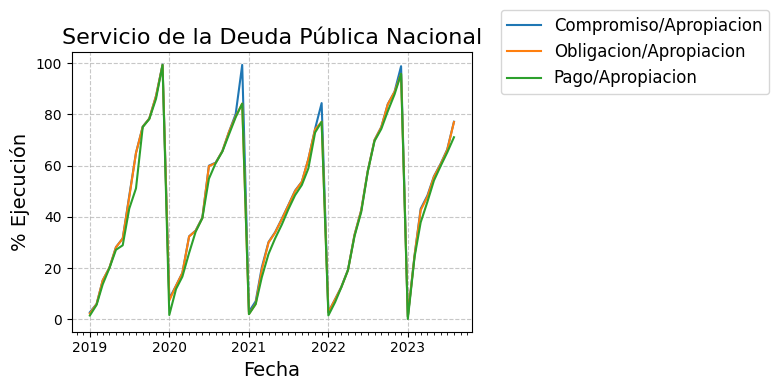

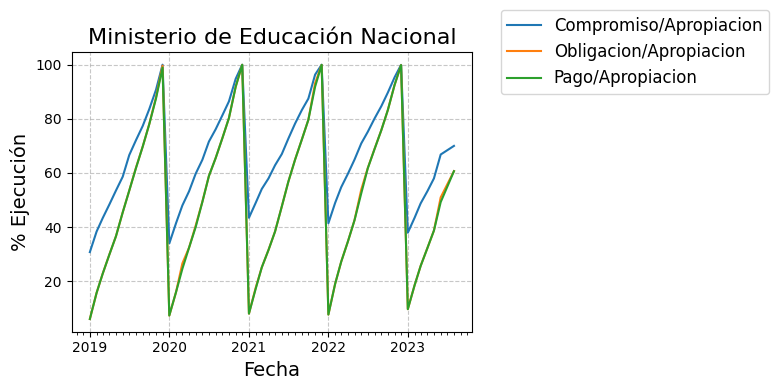

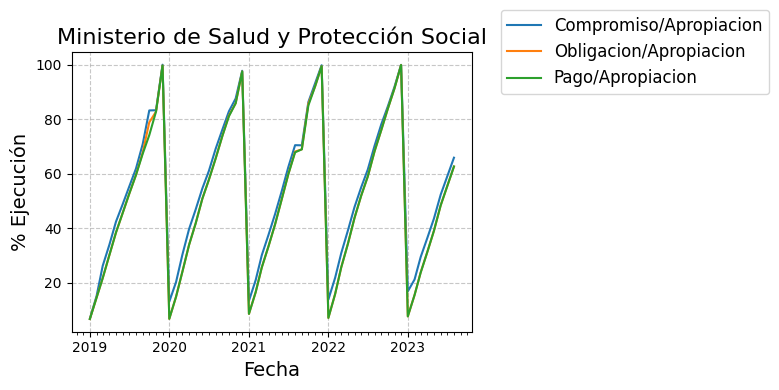

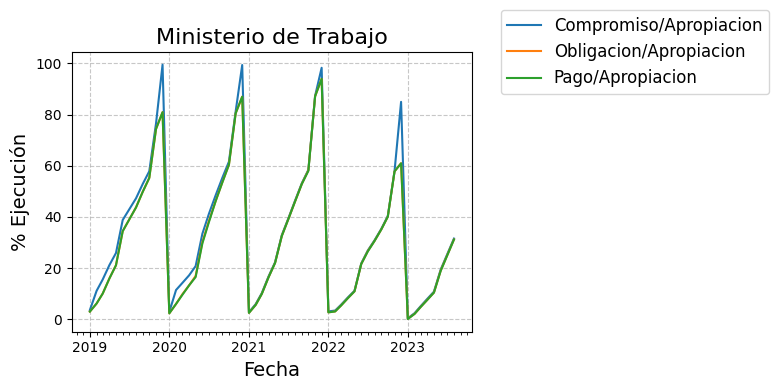

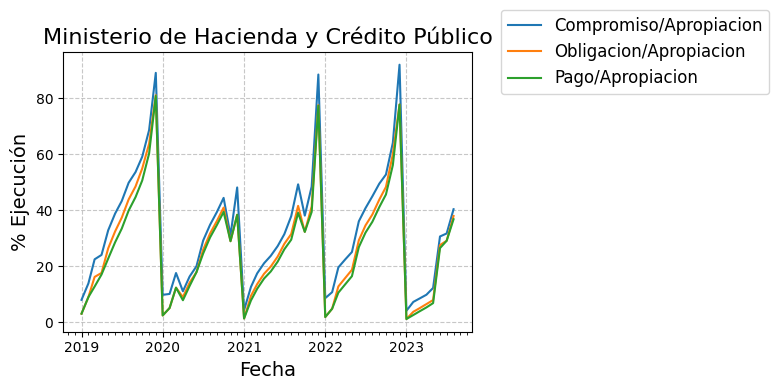

In [36]:
plot_ratios(SERV_DEUDA_PN, 'Servicio de la Deuda Pública Nacional')
plot_ratios(MIN_EDUC_GG, 'Ministerio de Educación Nacional')
plot_ratios(MIN_SALUD_GG, 'Ministerio de Salud y Protección Social')
plot_ratios(MIN_TRABAJO_GG, 'Ministerio de Trabajo')
plot_ratios(MIN_HACIENDA_GG, 'Ministerio de Hacienda y Crédito Público')

## Dashboard with HVPLOT

In [37]:
import hvplot.pandas
import panel as pn
import plotly.express as px
pn.extension('plotly')

In [38]:
dashboard = pn.Tabs()
tab_colors = {'Servicio de la Deuda Pública Nacional': '#0077b6',
                'Ministerio de Educación Nacional - Gestión General': '#0096c7',
                'Ministerio de Salud y Protección Social - Gestión General': '#00b4d8',
                'Ministerio del Trabajo - Gestión General': '#48cae4',
                'Ministerio de Hacienda y Crédito Público - Gestión General': '#48cae4'}

pie_colors = ['#5c677d','#e63946 ','#f1faee','#a8dadc','#457b9d','#1d3557']
for df_name, dataframe in [('Servicio de la Deuda Pública Nacional', SERV_DEUDA_PN),
                            ('Ministerio de Educación Nacional - Gestión General', MIN_EDUC_GG),
                            ('Ministerio de Salud y Protección Social - Gestión General', MIN_SALUD_GG),
                            ('Ministerio del Trabajo - Gestión General', MIN_TRABAJO_GG),
                            ('Ministerio de Hacienda y Crédito Público - Gestión General', MIN_HACIENDA_GG)]:
    # Pie Chart: Participación por UEJ
    pie_header = pn.pane.Markdown("# Participación por UEJ",
                                    styles={'font-size': '18px'},
                                    align='center')
    
    pieplot = px.pie(MAX_PARTICIPACION_PNG[['Unidad Ejecutora', 'Apropiacion']],
                values = 'Apropiacion',
                names = 'Unidad Ejecutora',
                title = None,
                height = 400,
                width = 800,
                color_discrete_sequence = pie_colors,
                hole = 0.6)
    
    pieplot.update_layout(title_font = dict(size = 30))
    pie_chart_panel = pn.pane.Plotly(pieplot)
    combined_pie_chart = pn.Column(pie_header, pie_chart_panel)
    
    # Series de tiempo: Ejecución por UEJ
    ts_header = pn.pane.Markdown("# Ejecución por UEJ",
                                    styles={'font-size': '20px'},
                                    align='center')
    
    ts_plot = dataframe.hvplot.line(title = None,
                                    height = 400,
                                    width = 700,
                                    legend = 'top')
    

    combined_ts_plot = pn.Column(ts_header, ts_plot)
    combined_plot = pn.Row(pn.Column(combined_pie_chart, align='center'),
                            pn.Column(combined_ts_plot, align='center'))

    # Encabezado y pie
    header = pn.Row(pn.pane.Markdown("# Unidades Ejecutoras - Participación & Ratios",
                    styles={'font-size': '18px'}),
                    align='center')
    footer = pn.pane.Markdown("###### Fuente: Sistema Integrado de Información Financiera - SIIF Nación. Elaboración propia",
                                styles={'font-size': '20px'}, align = 'end')
    # Carpeta per dataframe
    tab = pn.Column(header, pn.Row('### Julián Andrés Gómez Durán - BTG Pactual S.A. - Technical Test',
                                    styles = {'background':f'{tab_colors[df_name]}'},
                                    width = 1600),
                                    combined_plot, footer)
    dashboard.append((df_name, tab))

# Mostrar dashboard en navegador.
dashboard.show() 

Launching server at http://localhost:54865


AssertionError: 

In [ ]:
# Mostrar dashboard en cuaderno.
dashboard.servable()